# King Country Real Estate Pricing

## Import and data overview

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch


from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as mse 
from sklearn.model_selection import cross_val_score

In [43]:
def col_rename(df, dict_rules, ip=True):
    ''' rename columns in data frame using a dictionary of rules  '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(dict_rules,dict):
        z = df.rename(columns = dict_rules, inplace=ip)
    else:
        raise TypeError
    return z
#
def print_unique(df,col):
    ''' gives a list of unique values in a field '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(df[col],pd.core.frame.Series):
        z = df[col].unique()
    else:
        raise TypeError
    return z
#

In [44]:
df = pd.read_csv('kc_house_data.csv') # read the housing data
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Check for nan values

In [46]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [47]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Value counts for all columns

The label takes care of identifications so we can remove 'id'. We also chose to remove date sold and year renovated.

In [48]:
df.drop(labels=['id','date','yr_renovated'],axis=1,inplace=True) # drop

In [49]:

!pwd

/Users/antares/Projects/ironhack_da/IH_MIDTERM/kingcounty_working


## Price variation across region

In [50]:
df['price_sqft'] = df['price']/df['sqft_living']

In [51]:
KCo_map = gpd.read_file('King_County_Political_Boundary_no_waterbodies__kingco_area.shp')
KCo_map.set_crs(epsg=4326, inplace=True)
#crs = {'init':'espc:4326'}
#crs=CRS("epsg:3857")
#KCo_map = KCo_map.to_crs(crs)
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry = geometry)


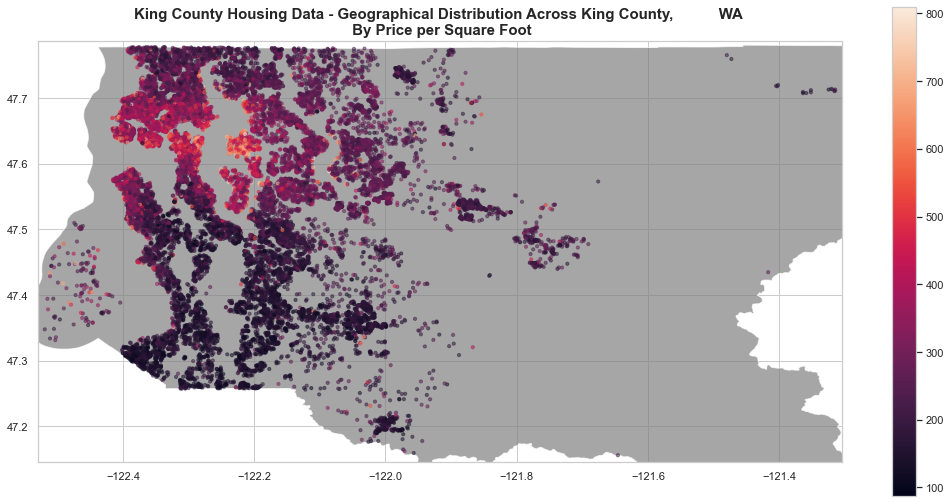

In [54]:
fig, ax = plt.subplots(figsize=(18,9))
KCo_map.plot(ax=ax, alpha=0.7,color='grey')
geo_df.plot(column=df['price_sqft'],ax=ax,alpha=0.5, legend=True,markersize=10)
plt.title('King County Housing Data - Geographical Distribution Across King County, \
          WA \n By Price per Square Foot', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(df.long.min()-0.01,df.long.max()+0.01)
plt.ylim(df.lat.min()-0.01, df.lat.max()+0.01)

plt.show()

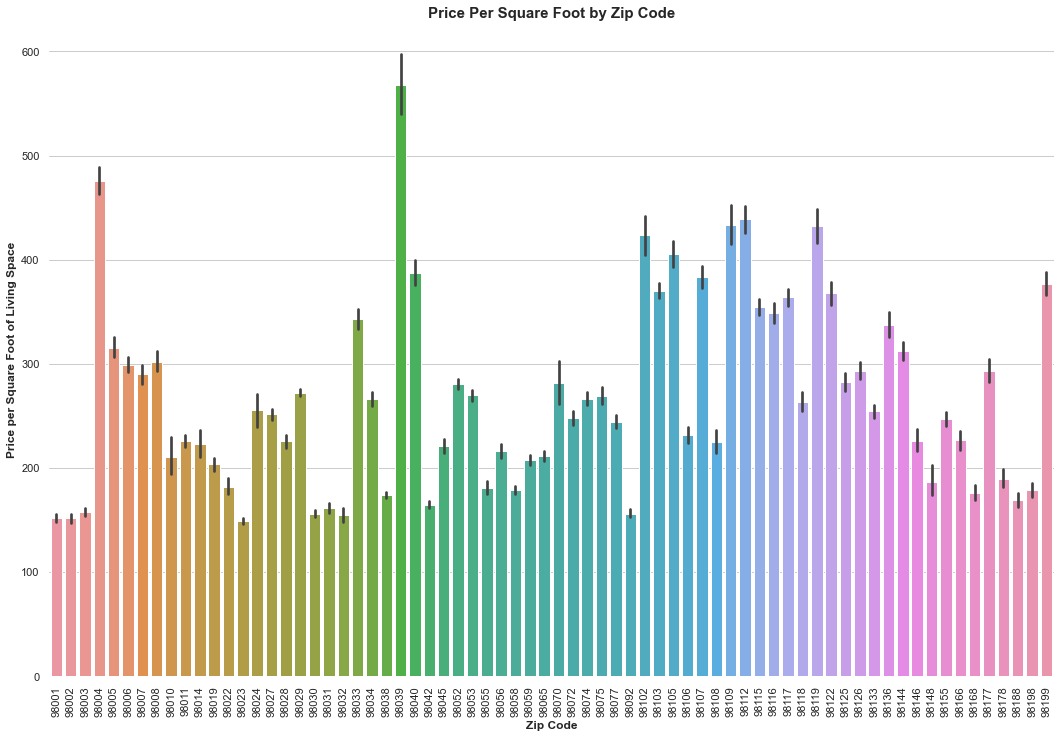

In [55]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="price_sqft", data=df, ax=ax)
ax.set_title("Price Per Square Foot by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Zip Code", fontsize=12,fontweight='bold')
ax.set_ylabel("Price per Square Foot of Living Space", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [56]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98039].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [57]:
df.drop(columns = ['lat', 'long', 'geometry'], inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,price_sqft
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,1986.552492,12768.455652,264.156594
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,685.391304,27304.179631,110.060793
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,399.000000,651.000000,87.588235
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,1490.000000,5100.000000,182.291667
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,7620.000000,244.644550
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,2360.000000,10083.000000,318.322981
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,6210.000000,871200.000000,810.138889


In [60]:
features = ['price', 'sqft_above','sqft_basement', 'sqft_lot', 'sqft_living15','sqft_lot15', 'sqft_living',
            'bedrooms','bathrooms','floors','waterfront',
            'view','condition','grade','yr_built',
            'zipcode']
#['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
   #    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
   #    'sqft_living15', 'sqft_lot15', 'waterfront']

In [62]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
corrm=df[features].corr()
corrm

,price,sqft_above,sqft_basement,sqft_lot,sqft_living15,sqft_lot15,sqft_living,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode
price,1.000000,0.605567,0.323816,0.089661,0.585379,0.082447,0.702035,0.308350,0.525138,0.256794,0.266369,0.397293,0.036362,0.667434,0.054012,-0.053203
sqft_above,0.605567,1.000000,-0.051943,0.183512,0.731870,0.194050,0.876597,0.477600,0.685342,0.523885,0.072075,0.167649,-0.158214,0.755923,0.423898,-0.261190
sqft_basement,0.323816,-0.051943,1.000000,0.015286,0.200355,0.017276,0.435043,0.303093,0.283770,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.133124,0.074845
sqft_lot,0.089661,0.183512,0.015286,1.000000,0.144608,0.718557,0.172826,0.031703,0.087740,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.053080,-0.129574
sqft_living15,0.585379,0.731870,0.200355,0.144608,1.000000,0.183192,0.756420,0.391638,0.568634,0.279885,0.086463,0.280439,-0.092824,0.713202,0.326229,-0.279033
sqft_lot15,0.082447,0.194050,0.017276,0.718557,0.183192,1.000000,0.183286,0.029244,0.087175,-0.011269,0.030703,0.072575,-0.003406,0.119248,0.070958,-0.147221
sqft_living,0.702035,0.876597,0.435043,0.172826,0.756420,0.183286,1.000000,0.576671,0.754665,0.353949,0.103818,0.284611,-0.058753,0.762704,0.318049,-0.199430
bedrooms,0.308350,0.477600,0.303093,0.031703,0.391638,0.029244,0.576671,1.000000,0.515884,0.175429,-0.006582,0.079532,0.028472,0.356967,0.154178,-0.152668
bathrooms,0.525138,0.685342,0.283770,0.087740,0.568634,0.087175,0.754665,0.515884,1.000000,0.500653,0.063744,0.187737,-0.124982,0.664983,0.506019,-0.203866
floors,0.256794,0.523885,-0.245705,-0.005201,0.279885,-0.011269,0.353949,0.175429,0.500653,1.000000,0.023698,0.029444,-0.263768,0.458183,0.489319,-0.059121


In [63]:
corrm['price'].sort_values()


zipcode         -0.053203
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

/var/folders/lj/my6r3k650wl54v5nz5r6x5cm0000gn/T/ipykernel_14784/2599800885.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[features].corr(), dtype=np.bool)


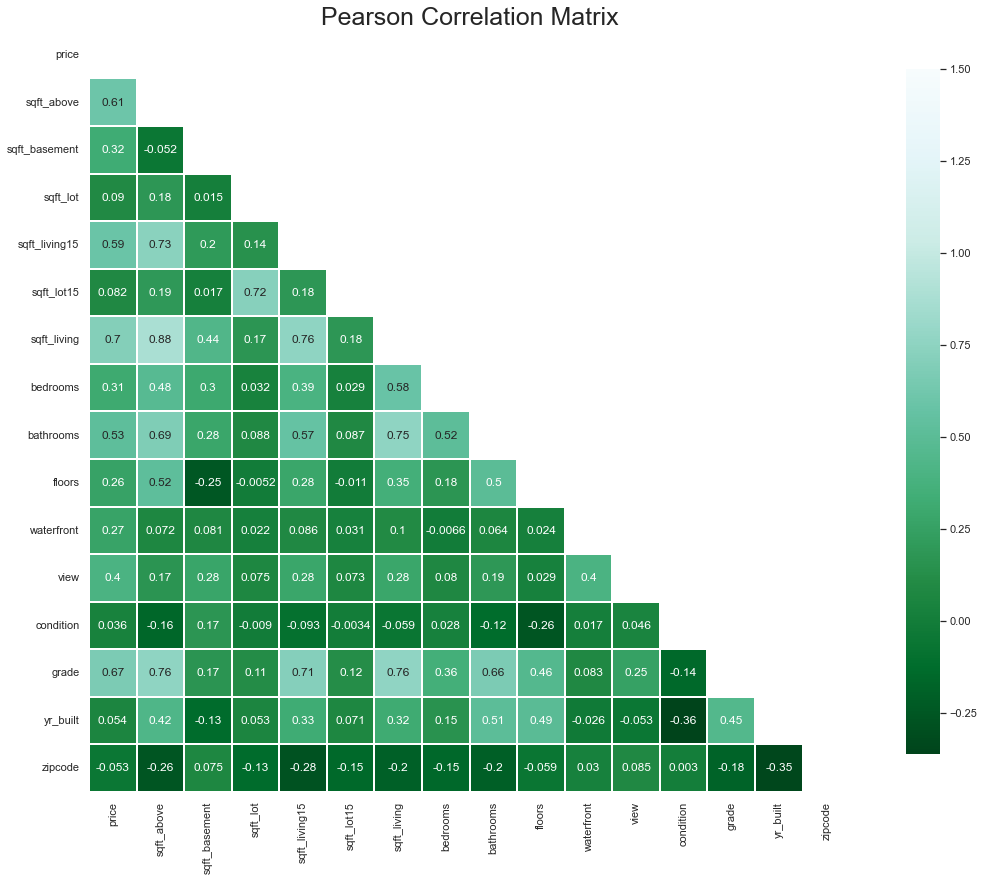

In [18]:


mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 14))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.2,vmax=1.5,square=True, cmap="BuGn_r",
            linecolor='w',annot=True,annot_kws={"size":12},mask=mask,cbar_kws={"shrink": .9});

 - sqft_living and sqft_above display a multicolinearity, having a Pearson correlation of 0.88. 
 - To a lesser extent, there was some multicollinearity between sqft_living and sqft_living15 (between the living space of the house in question and the 15 closest neighbors), as well as sqft_living and grade (0.77) and sqft_above and grade (0.76). With regard to the first relationship, sqft_living has a 0.70 correlation with the target variable, price, while sqft_above only has a 0.60 correlation; this suggests we should drop sqft_above. This may also remove the multicollinearity between sqft_above and grade. Considering the strength of the sqft_living variable, it would also make sense to drop sqft_living15. The grade variable has a strong correlation with price, so despite the collinearity with sqft_living, I'll leav it in for now. Finally, it just doesn't make logical sense to keep the neighbors' lot sizes if we're dropping their living space square footage; accordingly, we'll drop that variable (sqft_lot15), as well as the preceding three.

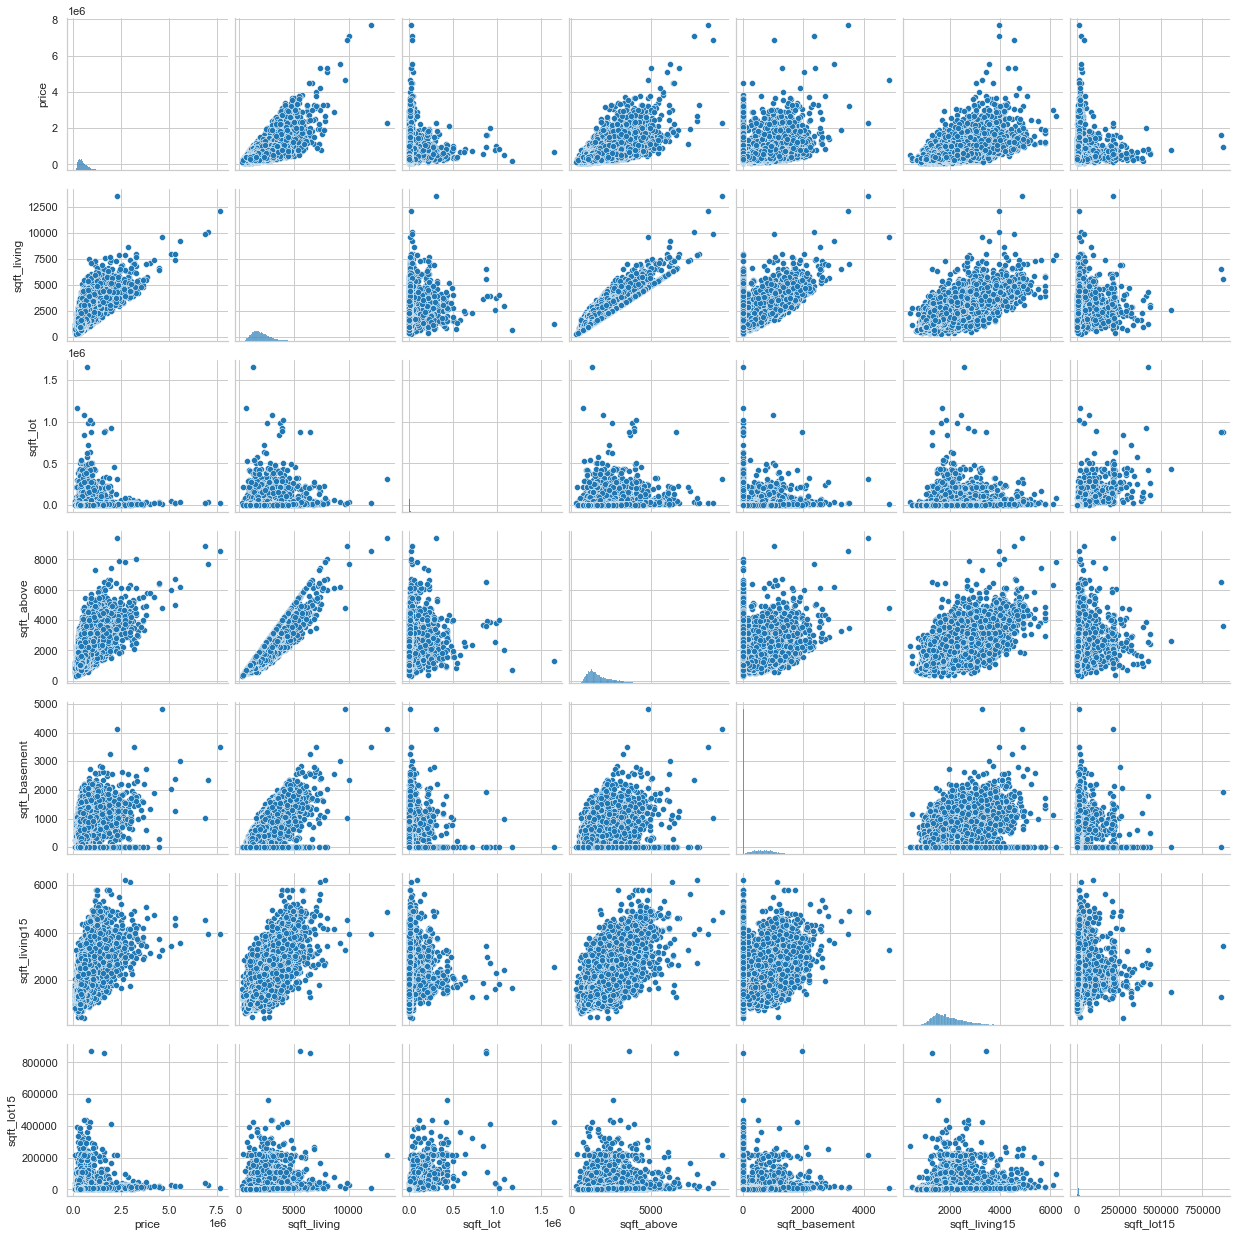

In [19]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                 'sqft_living15', 'sqft_lot15']])
plt.show()

sqft_lot and sqft_lot15 are not correlted linearly with price

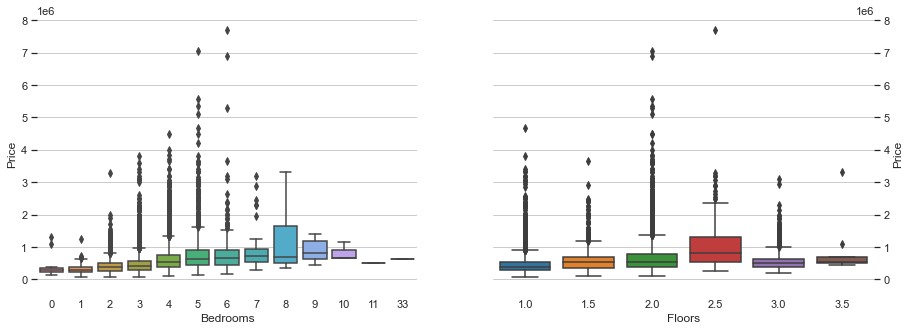

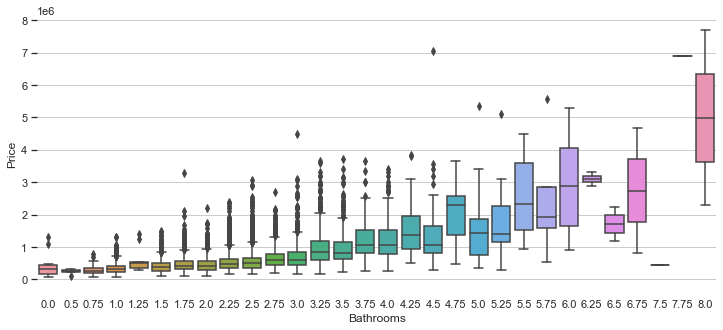

In [20]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y = df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y = df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price');

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

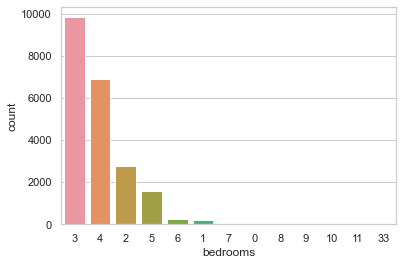

In [21]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

In [22]:
#limit dataset to properties with less than six bedrooms
df = df.loc[df['bedrooms'] < 7.0]
df = df.loc[df['bathrooms'] > 1.0]

(array([1.409e+04, 3.352e+03, 1.590e+02, 1.000e+01, 3.000e+00]),
 array([  590.,  2882.,  5174.,  7466.,  9758., 12050.]),
 <BarContainer object of 5 artists>)

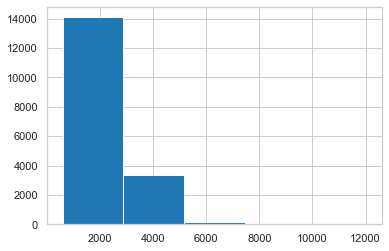

In [23]:
plt.hist('sqft_living',data=df,bins=5)

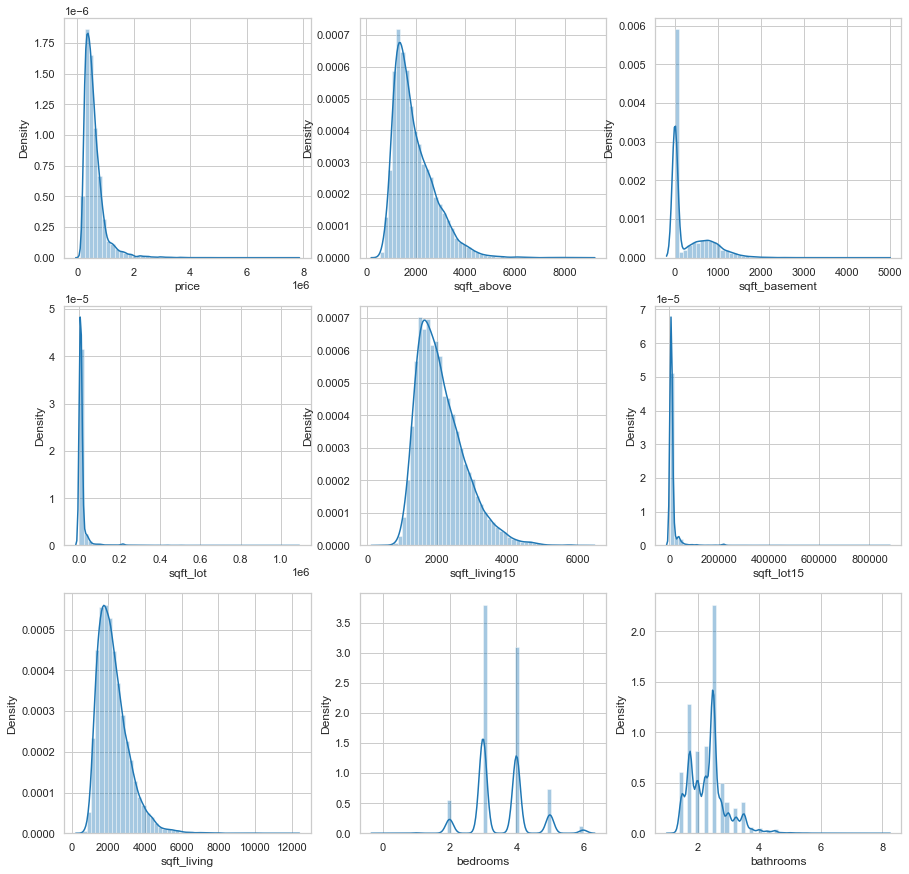

In [24]:
fig, axes = plt.subplots(ncols=3, nrows=3,figsize=(15,15))

for i, ax in zip(range(9), axes.flat):
    sns.distplot(df[features[i]], ax=ax, kde=True)
plt.show()

In [25]:
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
#df = h_df[(h_df['price'] >= np.percentile(h_df['price'], 0.5)) & (h_df['price'] <= np.percentile(h_df['price'], 99.5)) & (h_df['lat'] >= np.percentile(h_df['lat'], 0.05)) &  (h_df['lat'] < np.percentile(h_df['lat'], 99.95)) &(h_df['long'] >= np.percentile(h_df['long'], 0.05)) &(h_df['long'] <= np.percentile(h_df['long'], 99.95))]

In [26]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,price_sqft
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639,209.338521
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503,303.571429
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,98053,4760,101930,226.014760
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,98003,2238,6819,150.145773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,98136,2050,6200,287.037037
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,98116,1330,1265,362.595420
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,1530,1509,235.294118
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,1830,7200,173.160173


In [27]:
df['bathrooms'].value_counts()

2.50    5377
1.75    3047
2.25    2044
2.00    1929
1.50    1444
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
4.75      21
5.00      20
5.25      12
1.25       9
5.50       9
6.00       5
5.75       3
6.25       2
6.50       2
8.00       1
6.75       1
7.75       1
Name: bathrooms, dtype: int64

In [28]:
df[df['bathrooms']==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,price_sqft


In [29]:
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)

In [30]:
df.info() #Ensure those columns were dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17614 entries, 1 to 21611
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17614 non-null  float64
 1   bedrooms       17614 non-null  int64  
 2   bathrooms      17614 non-null  float64
 3   sqft_living    17614 non-null  int64  
 4   sqft_lot       17614 non-null  int64  
 5   floors         17614 non-null  float64
 6   waterfront     17614 non-null  int64  
 7   view           17614 non-null  int64  
 8   condition      17614 non-null  int64  
 9   grade          17614 non-null  int64  
 10  sqft_basement  17614 non-null  int64  
 11  yr_built       17614 non-null  int64  
 12  zipcode        17614 non-null  int64  
 13  price_sqft     17614 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


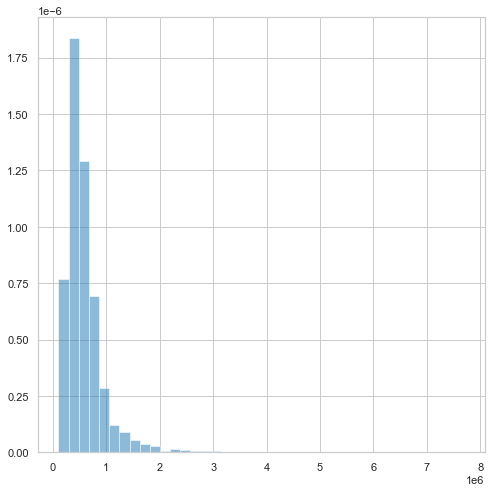

In [31]:
#Repeat histogram on price: 
price_hist = plt.figure(num=1, figsize=(8,8))
ax = price_hist.add_subplot(111)
ax.hist(df['price'], bins = 40, density = True, alpha = 0.5)
plt.show()


There is a upper ended tail to the normal distribution up a 

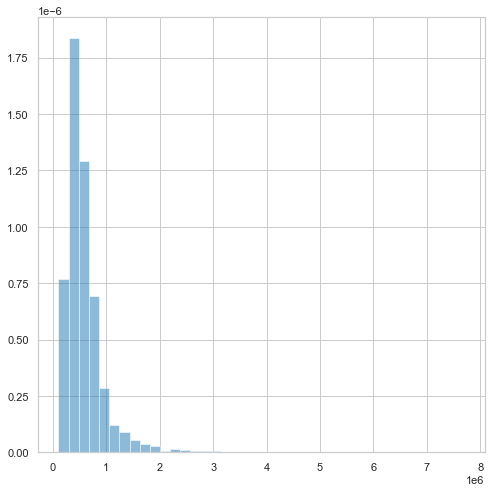

In [32]:
df = df.loc[df['price'] > 100000]
#df = df.loc[df['price'] < 00000]
df.describe() 
#Repeat histogram on price: 
price_hist = plt.figure(num=1, figsize=(8,8))
ax = price_hist.add_subplot(111)
ax.hist(df['price'], bins = 40, density = True, alpha = 0.5)
plt.show()


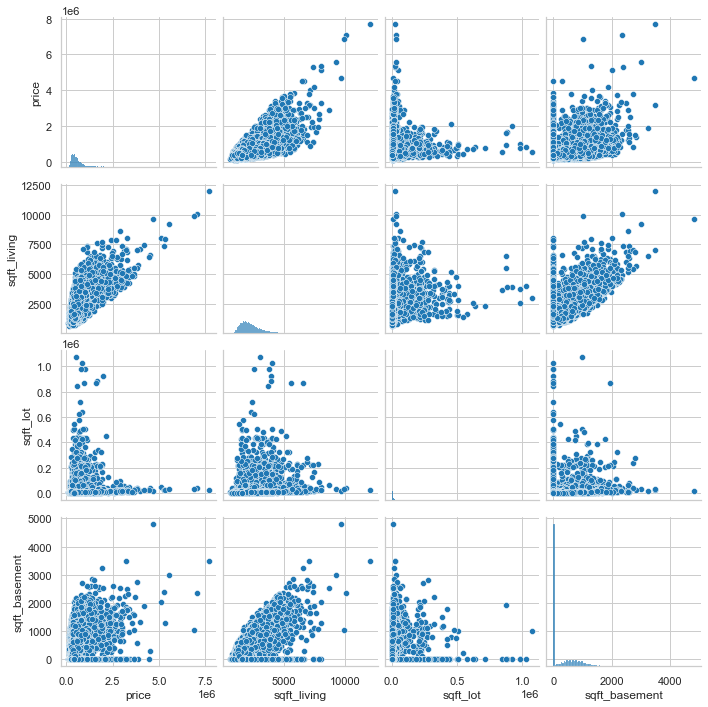

In [33]:
sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_basement']])
plt.show()

In [34]:
df['log_sqft_lot'] = df['sqft_lot'].copy()
df['log_sqft_lot'] = df['log_sqft_lot'].map(lambda x: np.log(x))

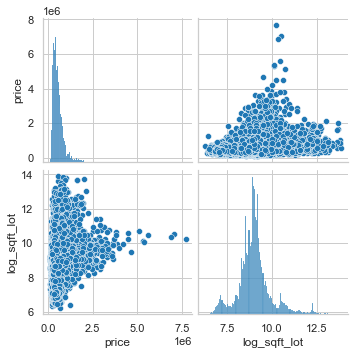

In [35]:
sns.pairplot(df[['price', 'log_sqft_lot']])
plt.show()

In [36]:


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df[['price', 'bedrooms', 'sqft_living', 'log_sqft_lot', 'floors',
       'condition', 'sqft_basement', 'yr_built', 'waterfront']].corr()



,price,bedrooms,sqft_living,log_sqft_lot,floors,condition,sqft_basement,yr_built,waterfront
price,1.000000,0.260382,0.694766,0.177454,0.184684,0.045679,0.287114,-0.041280,0.289013
bedrooms,0.260382,1.000000,0.515547,0.206594,0.037976,0.040033,0.258781,-0.013597,-0.010334
sqft_living,0.694766,0.515547,1.000000,0.384364,0.232847,-0.060916,0.372132,0.165944,0.118638
log_sqft_lot,0.177454,0.206594,0.384364,1.000000,-0.281385,0.089393,0.094385,-0.067522,0.072502
floors,0.184684,0.037976,0.232847,-0.281385,1.000000,-0.308229,-0.364909,0.457648,0.022219
condition,0.045679,0.040033,-0.060916,0.089393,-0.308229,1.000000,0.215939,-0.455671,0.015368
sqft_basement,0.287114,0.258781,0.372132,0.094385,-0.364909,0.215939,1.000000,-0.277187,0.084337
yr_built,-0.041280,-0.013597,0.165944,-0.067522,0.457648,-0.455671,-0.277187,1.000000,-0.039292
waterfront,0.289013,-0.010334,0.118638,0.072502,0.022219,0.015368,0.084337,-0.039292,1.000000


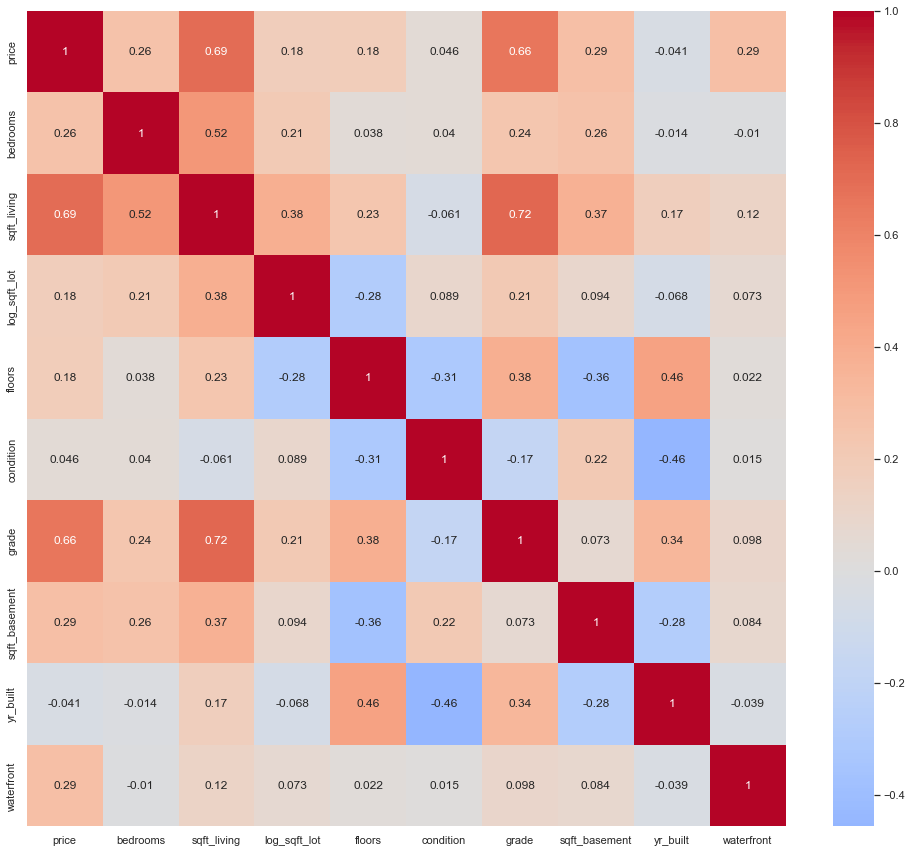

In [37]:
plt.subplots(figsize=(17,15))
sns.heatmap(df[['price', 'bedrooms', 'sqft_living', 'log_sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'waterfront']].corr(), 
        center=0,annot=True, cmap='coolwarm')
plt.show()

In [38]:
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

df = df.drop(['zipcode'], axis=1)
df = pd.concat([df, zipcode_dummies], axis=1)


In [39]:
Y = df.price
features = df.drop(['price'], axis = 1)


In [40]:
formula = 'Y ~ bedrooms + bathrooms + sqft_living + floors + condition + grade + view \
            + sqft_basement + yr_built + waterfront + log_sqft_lot + zip_98002 \
            + zip_98003 + zip_98004 + zip_98005 + zip_98006 + zip_98007 + zip_98008 \
            + zip_98010 + zip_98011 + zip_98014 + zip_98019 + zip_98022 + zip_98023 \
            + zip_98024 + zip_98027 + zip_98028 + zip_98029 + zip_98030 + zip_98031 \
            + zip_98032 + zip_98033 + zip_98034 + zip_98038 + zip_98038 + zip_98040 \
            + zip_98042 + zip_98045 + zip_98052 + zip_98053 + zip_98055 + zip_98056 \
            + zip_98058 + zip_98059 + zip_98065 + zip_98070 + zip_98072 + zip_98074 \
            + zip_98075 + zip_98077 + zip_98092 + zip_98102 + zip_98103 + zip_98105 \
            + zip_98106 + zip_98107 + zip_98108 + zip_98109 + zip_98112 + zip_98115 \
            + zip_98116 + zip_98117 + zip_98118 + zip_98119 + zip_98122 + zip_98125 \
            + zip_98126 + zip_98133 + zip_98136 + zip_98144 + zip_98146 + zip_98148 \
            + zip_98155 + zip_98166 + zip_98168 + zip_98177 + zip_98178 + zip_98188 \
            + zip_98198 + zip_98199'
model = ols(formula = formula, data = features).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     812.7
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:22:08   Log-Likelihood:            -2.3792e+05
No. Observations:               17614   AIC:                         4.760e+05
Df Residuals:                   17534   BIC:                         4.766e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.326e+05   1.59e+05      5.861      0.000    6.21e+05    1.24e+06
bedrooms      -3.041e+04   2053.746    -14.806      0.000   -3.44e+04   -2.64e+04
bathrooms      6.079e+04   3435.736     17.693      0.000    5.41e+04    6.75e+04
sqft_living     207.8622      3.485     59.636      0.000     201.030     214.694
floors        -5.267e+04   3868.068    -13.617      0.000   -6.03e+04   -4.51e+04
condition      2.714e+04   2443.976     11.107      0.000    2.24e+04    3.19e+04
grade          7.003e+04   2153.058     32.527      0.000    6.58e+04    7.43e+04
view           5.352e+04   2018.813     26.509      0.000    4.96e+04    5.75e+04
sqft_basement   -75.2809      4.266    -17.645      0.000     -83.644     -66.918
yr_built       -772.9102     78.134     -9.892      0.000    -926.060    -619.760
waterfront      7.15e+05   1.64e+04     43.507      0.000    6.83e+05    7.47e+05
log_sqft_lot   1.084e+04   2219.140      4.885      0.000    6490.110    1.52e+04
zip_98002     -1.487e+05   1.78e+04     -8.336      0.000   -1.84e+05   -1.14e+05
zip_98003     -1.982e+05   1.51e+04    -13.136      0.000   -2.28e+05   -1.69e+05
zip_98004      6.009e+05   1.44e+04     41.722      0.000    5.73e+05    6.29e+05
zip_98005      1.145e+05    1.7e+04      6.719      0.000    8.11e+04    1.48e+05
zip_98006      8.023e+04   1.28e+04      6.252      0.000    5.51e+04    1.05e+05
zip_98007      7.111e+04   1.85e+04      3.838      0.000    3.48e+04    1.07e+05
zip_98008       7.91e+04   1.48e+04      5.338      0.000    5.01e+04    1.08e+05
zip_98010     -1.317e+05   2.22e+04     -5.944      0.000   -1.75e+05   -8.82e+04
zip_98011     -4.811e+04   1.62e+04     -2.963      0.003   -7.99e+04   -1.63e+04
zip_98014     -9.883e+04   2.07e+04     -4.763      0.000   -1.39e+05   -5.82e+04
zip_98019     -8.053e+04   1.66e+04     -4.848      0.000   -1.13e+05    -4.8e+04
zip_98022     -1.953e+05   1.65e+04    -11.841      0.000   -2.28e+05   -1.63e+05
zip_98023      -2.24e+05   1.29e+04    -17.316      0.000   -2.49e+05   -1.99e+05
zip_98024     -4.257e+04   2.49e+04     -1.713      0.087   -9.13e+04    6151.279
zip_98027     -1.252e+04   1.33e+04     -0.942      0.346   -3.86e+04    1.35e+04
zip_98028     -4.974e+04   1.48e+04     -3.354      0.001   -7.88e+04   -2.07e+04
zip_98029      3.625e+04    1.4e+04      2.590      0.010    8819.490    6.37e+04
zip_98030     -1.669e+05   1.52e+04    -10.998      0.000   -1.97e+05   -1.37e+05
zip_98031     -1.566e+05   1.48e+04    -10.569      0.000   -1.86e+05   -1.28e+05
zip_98032     -1.923e+05   2.16e+04     -8.888      0.000   -2.35e+05    -1.5e+05
zip_98033      1.865e+05   1.33e+04     14.049      0.000    1.61e+05    2.13e+05
zip_98034      3.121e+04   1.26e+04      2.467      0.014    6417.588     5.6e+04
zip_98038      -1.34e+05   1.22e+04    -10.980   